In [608]:
import pandas as pd
import numpy as np
from collections import defaultdict, namedtuple
import matplotlib.pyplot as plt
import random

# **Data Preprocessing**

In [609]:
ratings=pd.read_csv('ratings.csv')
movies=pd.read_csv('movies.csv')


In [610]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [611]:
print(ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None


In [612]:
print("Number of unique userId:", ratings["userId"].nunique())
print("Number of unique movies:", ratings["movieId"].nunique())

Number of unique userId: 610
Number of unique movies: 9724


In [613]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [614]:
print(movies.info())
print(movies.movieId.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None
9742


In [615]:
ratings=ratings.merge(movies,on='movieId',how='left')
ratings.head(100)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
95,1,1445,3.0,964984112,McHale's Navy (1997),Comedy|War
96,1,1473,4.0,964980875,Best Men (1997),Action|Comedy|Crime|Drama
97,1,1500,4.0,964980985,Grosse Pointe Blank (1997),Comedy|Crime|Romance
98,1,1517,5.0,964981107,Austin Powers: International Man of Mystery (1...,Action|Adventure|Comedy


In [616]:
print("Number of unique movies:", ratings["movieId"].nunique())

Number of unique movies: 9724


In [617]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 4.6+ MB


In [618]:
filtered_df=ratings[ratings['rating']>2.0]
filtered_df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [619]:
counts=filtered_df.groupby('userId')['movieId'].count()
print(counts)
active_users=counts[counts >10].index
print(f"Number of active users: {len(active_users)}")

userId
1       226
2        28
3        18
4       167
5        40
       ... 
606    1070
607     174
608     670
609      37
610    1233
Name: movieId, Length: 610, dtype: int64
Number of active users: 607


In [620]:
filtered_df=filtered_df[filtered_df['userId'].isin(active_users)]

**Transactional Dataset**

In [621]:
transactions=filtered_df.groupby('userId')['movieId'].apply(list)
transactions.shape

(607,)

In [622]:
# transactions_df = {
#     1: [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110],
#     2: [15, 25, 35, 45, 55],
#     3: [12, 22, 32, 42, 52, 62, 72, 82, 92, 102],
#     4: [14, 24, 34, 44, 54, 64, 74, 84, 94, 104, 114, 124],
#     5: [13, 23, 33],
# }

In [623]:
train_transactions = {}
test_transactions = {}

for user, items in transactions.items():
    num_items = len(items)
    if(num_items<=2):
      print("This is the userId with less than 10 movies",user)
      continue
    test_size = max(1, int(0.2 * num_items)) if num_items > 1 else 1
    test_items = random.sample(items, test_size)
    train_items = list(set(items) - set(test_items))
    train_transactions[user] = train_items
    test_transactions[user] = test_items

train_transactions = {user: items for user, items in train_transactions.items() if items}
test_transactions = {user: items for user, items in test_transactions.items() if items}


In [624]:
print(len(train_transactions))
print(len(test_transactions))

607
607


In [625]:
total_train_movies = sum(len(items) for items in train_transactions.values())
total_test_movies = sum(len(items) for items in test_transactions.values())
total_movies = total_train_movies + total_test_movies

train_percentage = (total_train_movies / total_movies) * 100
test_percentage = (total_test_movies / total_movies) * 100

print(f"Training Set: {train_percentage:.2f}%")
print(f"Test Set: {test_percentage:.2f}%")


Training Set: 80.26%
Test Set: 19.74%


In [626]:
transactions.values

array([list([1, 3, 6, 47, 50, 70, 101, 110, 151, 157, 163, 216, 223, 231, 235, 260, 296, 316, 333, 349, 356, 362, 367, 423, 441, 457, 480, 500, 527, 543, 552, 553, 590, 592, 593, 596, 608, 648, 661, 673, 733, 736, 780, 804, 919, 923, 940, 943, 954, 1009, 1023, 1024, 1025, 1029, 1030, 1031, 1032, 1042, 1049, 1060, 1073, 1080, 1089, 1090, 1092, 1097, 1127, 1136, 1196, 1197, 1198, 1206, 1208, 1210, 1213, 1214, 1220, 1222, 1224, 1226, 1240, 1256, 1258, 1265, 1270, 1275, 1278, 1282, 1291, 1298, 1348, 1377, 1396, 1408, 1445, 1473, 1500, 1517, 1552, 1573, 1580, 1587, 1617, 1620, 1625, 1644, 1676, 1732, 1777, 1793, 1804, 1805, 1920, 1927, 1954, 1967, 2000, 2005, 2012, 2018, 2028, 2033, 2046, 2048, 2054, 2058, 2078, 2090, 2093, 2094, 2096, 2099, 2105, 2115, 2116, 2137, 2139, 2141, 2143, 2161, 2174, 2193, 2268, 2273, 2291, 2329, 2353, 2366, 2387, 2395, 2406, 2414, 2427, 2450, 2459, 2470, 2478, 2492, 2502, 2528, 2529, 2542, 2571, 2580, 2596, 2616, 2628, 2640, 2641, 2644, 2648, 2654, 2657, 2692, 2

# **FP_Tree**

In [627]:
class FPTreeNode:
    def __init__(self, item, count, parent):
        self.item = item
        self.count = count
        self.parent = parent
        self.children = {}
        self.node_link = None

    def increment(self, count):
        self.count += count


In [628]:
def build_fp_tree(transactions, minsup):
    item_counts = defaultdict(int)
    for items in transactions.values():
        for item in items:
            item_counts[item] += 1

    item_counts = {item: count for item, count in item_counts.items() if count >= minsup}
    if not item_counts:
        return None, None

    header_table = {item: [count, None] for item, count in item_counts.items()}

    root = FPTreeNode(None, 1, None)
    for items in transactions.values():
        sorted_items = [item for item in items if item in item_counts]
        sorted_items.sort(key=lambda item: item_counts[item],reverse=True)
        current_node = root
        for item in sorted_items:
            if item in current_node.children:
                current_node.children[item].increment(1)
            else:
                new_node = FPTreeNode(item, 1, current_node)
                current_node.children[item] = new_node

                if header_table[item][1] is None:
                    header_table[item][1] = new_node
                else:
                    node = header_table[item][1]
                    while node.node_link is not None:
                        node = node.node_link
                    node.node_link = new_node
            current_node = current_node.children[item]
    return root, header_table


In [629]:
def mine_fp_tree(header_table, minsup,prefix,frequent_itemsets):
    sorted_items = sorted(header_table.items(), key=lambda x: x[1][0])
    for item, item_info in sorted_items:
        new_prefix = prefix.copy()
        new_prefix.add(item)
        support = item_info[0]
        frequent_itemsets[frozenset(new_prefix)] = support

        conditional_pattern_base = []
        node = item_info[1]
        while node is not None:
            path = []
            parent = node.parent
            while parent.item is not None:
                path.append(parent.item)
                parent = parent.parent
            if path:
                for i in range(node.count):
                    conditional_pattern_base.append(path)
            node = node.node_link

        conditional_tree, conditional_header = build_fp_tree(
            {idx: path for idx, path in enumerate(conditional_pattern_base)}, minsup
        )
        if conditional_header is not None:
            mine_fp_tree(conditional_header, minsup, new_prefix, frequent_itemsets)


In [630]:
minsup = 50
minconf = 0.1


In [631]:
root, header_table = build_fp_tree(train_transactions, minsup)


In [632]:
frequent_itemsets = {}
mine_fp_tree(header_table, minsup,set(),frequent_itemsets)

# **Association Rule**

In [633]:
association_rules = []
for itemset in frequent_itemsets:
    if len(itemset) >=2:
        subsets = [frozenset([item]) for item in itemset]
        for X in subsets:
            Y = itemset - X
            support_XY = frequent_itemsets[itemset]
            support_X = frequent_itemsets.get(X, 0)
            if support_X > 0:
                confidence = support_XY / support_X
                if confidence >= minconf:
                    association_rules.append({
                        'X': X,
                        'Y': Y,
                        'support': support_XY,
                        'confidence': confidence
                    })


In [634]:
movie_id_to_title = pd.Series(movies.title.values, index=movies.movieId).to_dict()


In [635]:
cnt=0
for rule in association_rules:
    rule['X_titles'] = [movie_id_to_title.get(item, str(item)) for item in rule['X']]
    rule['Y_titles'] = [movie_id_to_title.get(item, str(item)) for item in rule['Y']]



In [636]:
# Top 100 rules by support
top_rules_support = sorted(association_rules, key=lambda x: x['support'], reverse=True)[:100]

# Top 100 rules by confidence
top_rules_confidence = sorted(association_rules, key=lambda x: x['confidence'], reverse=True)[:100]

# common rules
top_rules_confidence_set = set((frozenset(rule['X']), frozenset(rule['Y'])) for rule in top_rules_confidence)
common_rules = [rule for rule in top_rules_support if (frozenset(rule['X']), frozenset(rule['Y'])) in top_rules_confidence_set]

common_rules_sorted = sorted(common_rules, key=lambda x: x['confidence'], reverse=True)


In [637]:
print("Shared Association Rules (sorted by confidence):\n")
for rule in common_rules_sorted:
    print(f"Rule: {rule['X_titles']} -> {rule['Y_titles']}, Support: {rule['support']}, Confidence: {rule['confidence']:.2f}")


Shared Association Rules (sorted by confidence):

Rule: ['Star Wars: Episode VI - Return of the Jedi (1983)'] -> ['Star Wars: Episode IV - A New Hope (1977)'], Support: 105, Confidence: 0.71
Rule: ['Lord of the Rings: The Return of the King, The (2003)'] -> ['Lord of the Rings: The Fellowship of the Ring, The (2001)'], Support: 102, Confidence: 0.71
Rule: ['Back to the Future (1985)'] -> ['Forrest Gump (1994)'], Support: 91, Confidence: 0.71
Rule: ['Lord of the Rings: The Two Towers, The (2002)'] -> ['Lord of the Rings: The Return of the King, The (2003)'], Support: 95, Confidence: 0.70
Rule: ['Star Wars: Episode V - The Empire Strikes Back (1980)'] -> ['Star Wars: Episode IV - A New Hope (1977)'], Support: 120, Confidence: 0.70
Rule: ['Lord of the Rings: The Fellowship of the Ring, The (2001)'] -> ['Lord of the Rings: The Return of the King, The (2003)'], Support: 102, Confidence: 0.69
Rule: ['Lord of the Rings: The Two Towers, The (2002)'] -> ['Lord of the Rings: The Fellowship of th

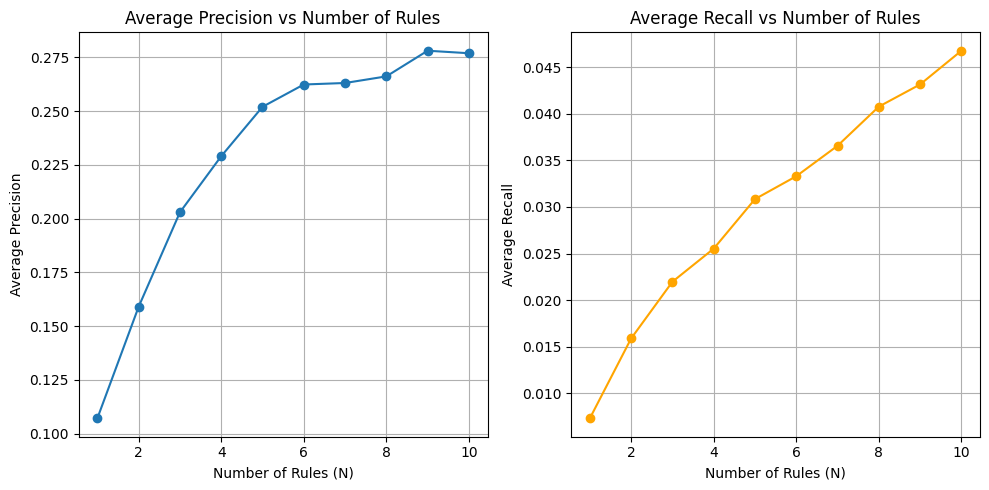

In [638]:
import numpy as np
import matplotlib.pyplot as plt

def recommend_items(user_id, train_transactions, association_rules, N):
    user_train_items = set(train_transactions.get(user_id, []))
    user_rules = []

    for rule in association_rules:
        if len(rule['X']) == 1 and rule['X'].issubset(user_train_items):
            user_rules.append(rule)

    user_rules.sort(key=lambda x: x['confidence'], reverse=True)

    top_rules = user_rules[:N]

    recommended_items = set()
    for rule in top_rules:
        recommended_items.update(rule['Y'])

    recommended_items -= user_train_items

    return recommended_items

max_N = 10
precision_values = []
recall_values = []

test_users = list(test_transactions.keys())

for N in range(1, max_N + 1):
    precision_list = []
    recall_list = []
    for user_id in test_users:
        recommended_items = recommend_items(user_id, train_transactions, association_rules, N)
        test_items = set(test_transactions.get(user_id, []))

        relevant_recommendations = recommended_items.intersection(test_items)

        if recommended_items:
            precision = len(relevant_recommendations) / len(recommended_items)
        else:
            precision = 0

        if test_items:
            recall = len(relevant_recommendations) / len(test_items)
        else:
            recall = 0

        precision_list.append(precision)
        recall_list.append(recall)

    avg_precision = np.mean(precision_list)
    avg_recall = np.mean(recall_list)
    precision_values.append(avg_precision)
    recall_values.append(avg_recall)


plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
plt.plot(range(1, max_N + 1), precision_values, marker='o')
plt.title('Average Precision vs Number of Rules')
plt.xlabel('Number of Rules (N)')
plt.ylabel('Average Precision')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, max_N + 1), recall_values, marker='o', color='orange')
plt.title('Average Recall vs Number of Rules')
plt.xlabel('Number of Rules (N)')
plt.ylabel('Average Recall')
plt.grid(True)

plt.tight_layout()
plt.show()


In [639]:
import random
sample_size = 10
sample_users = random.sample(list(test_transactions.keys()), sample_size)


In [640]:
def recommend_items(user_id, train_transactions, association_rules):
    user_items = set(train_transactions.get(user_id, []))

    candidate_items = set()
    for rule in association_rules:
        X = rule['X']
        Y = rule['Y']
        if X.issubset(user_items):
            candidate_items.update(Y)
    recommendations = candidate_items - user_items
    return recommendations


In [641]:
precision_list = []
recall_list = []

for user_id in sample_users:
    recommendations = recommend_items(user_id, train_transactions, association_rules)
    test_items = set(test_transactions.get(user_id, []))

    relevant_recommendations = recommendations.intersection(test_items)

    if recommendations:
        precision = len(relevant_recommendations) / len(recommendations)
    else:
        precision = 0

    if test_items:
        recall = len(relevant_recommendations) / len(test_items)
    else:
        recall = 0

    precision_list.append(precision)
    recall_list.append(recall)

    print(f"User ID: {user_id}")
    print(f"Recommendations: {recommendations}")
    print(f"Test Items: {test_items}")
    print(f"Precision: {precision:.2f}, Recall: {recall:.2f}\n")


User ID: 384
Recommendations: {1, 33794, 10, 2571, 1036, 527, 541, 32, 1580, 47, 50, 1089, 2115, 586, 588, 589, 590, 592, 593, 595, 597, 608, 110, 111, 1136, 4226, 648, 1682, 150, 44191, 165, 1704, 1193, 1196, 1197, 1198, 1200, 1206, 1210, 1213, 1214, 58559, 7361, 1221, 2762, 4306, 1240, 6874, 231, 6377, 1258, 1265, 1270, 8961, 260, 1291, 780, 4878, 7438, 4886, 2329, 79132, 293, 2858, 316, 318, 5952, 5445, 858, 349, 4963, 356, 5989, 364, 3949, 4973, 367, 377, 380, 4993, 4995, 48516, 6539, 2997, 2028, 7153, 500, 3578}
Test Items: {4322, 1258, 1036, 60, 2734, 3471, 1204, 1206, 2268}
Precision: 0.03, Recall: 0.33

User ID: 495
Recommendations: {1, 33794, 2, 10, 1036, 527, 541, 32, 47, 1089, 2115, 2628, 3147, 589, 590, 592, 593, 595, 597, 608, 110, 111, 1136, 4226, 648, 2716, 44191, 165, 1193, 1196, 1197, 1198, 1200, 1206, 1210, 1213, 1214, 58559, 1221, 1222, 2762, 3793, 4306, 1240, 733, 736, 5349, 6377, 1265, 1270, 8961, 260, 778, 1291, 4878, 4886, 2329, 293, 296, 5418, 2858, 316, 5952, 5

In [642]:
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)

print(f"Average Precision: {average_precision:.2f}")
print(f"Average Recall: {average_recall:.2f}")


Average Precision: 0.05
Average Recall: 0.30


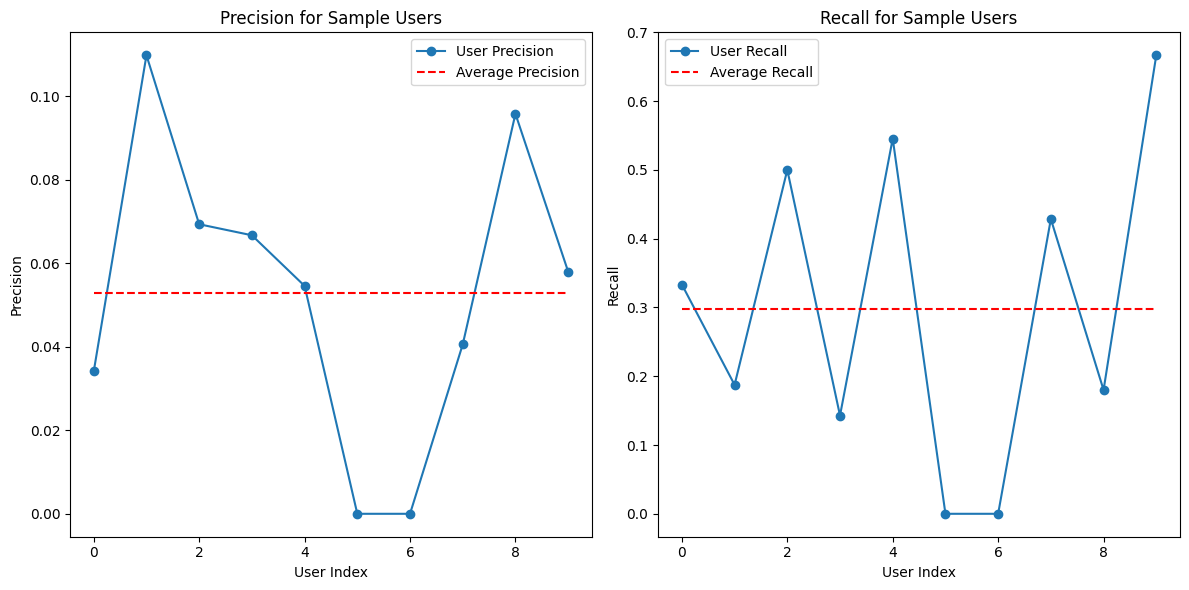

In [643]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(len(sample_users)), precision_list, marker='o', label='User Precision')
plt.hlines(average_precision, xmin=0, xmax=len(sample_users)-1, colors='r', linestyles='dashed', label='Average Precision')
plt.title('Precision for Sample Users')
plt.xlabel('User Index')
plt.ylabel('Precision')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(len(sample_users)), recall_list, marker='o', label='User Recall')
plt.hlines(average_recall, xmin=0, xmax=len(sample_users)-1, colors='r', linestyles='dashed', label='Average Recall')
plt.title('Recall for Sample Users')
plt.xlabel('User Index')
plt.ylabel('Recall')
plt.legend()

plt.tight_layout()
plt.show()
